In [33]:
from pathlib import Path
from metadata import ImageDataset, patient
import utils
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
notebooks_path = Path.cwd()
repo_path = notebooks_path.parent
print(f'The current directory is: {notebooks_path}')

The current directory is: /home/ricardino/Documents/MAIA/tercer_semestre/MISA/final_project/MISA_FINAL_PROJECT/notebooks


# MAIN

## Classic models

In [18]:
#we will compute the boxplot for the following models
# model_list = ['TModel_dice_Validation', 'most_similar_dice', 'mean_atlas_dice', 'weighted_labels_dice', 'top_atlases_dice', 'bayesian_dice', 'unet_dice']
model_list = ['TModel_metrics_Validation', 'most_similar_metrics', 'mean_atlas_metrics', 'weighted_labels_metrics', 'top_atlases_metrics', 'bayesian_metrics',
              'EM_bayesian_metrics', 'EM_kmeans_metrics', 'DenseUnet_CE_metrics']
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df


,id_val,CSF,GM,WM,metric,model
0,11,0.204935,0.884896,0.906621,dice,TModel Validation
1,11,55.398556,16.911535,12.727922,hd,TModel Validation
2,11,-0.684423,-0.118016,0.025525,vdiff,TModel Validation
3,12,0.150694,0.888044,0.878158,dice,TModel Validation
4,12,53.509345,15.937377,10.488088,hd,TModel Validation
...,...,...,...,...,...,...
10,14,12.785795,11.597750,7.558367,hd,DenseUnet CE
11,14,-0.048434,-0.030407,0.022034,vdiff,DenseUnet CE
12,17,0.900739,0.936997,0.911871,dice,DenseUnet CE
13,17,14.456611,15.121552,10.881697,hd,DenseUnet CE


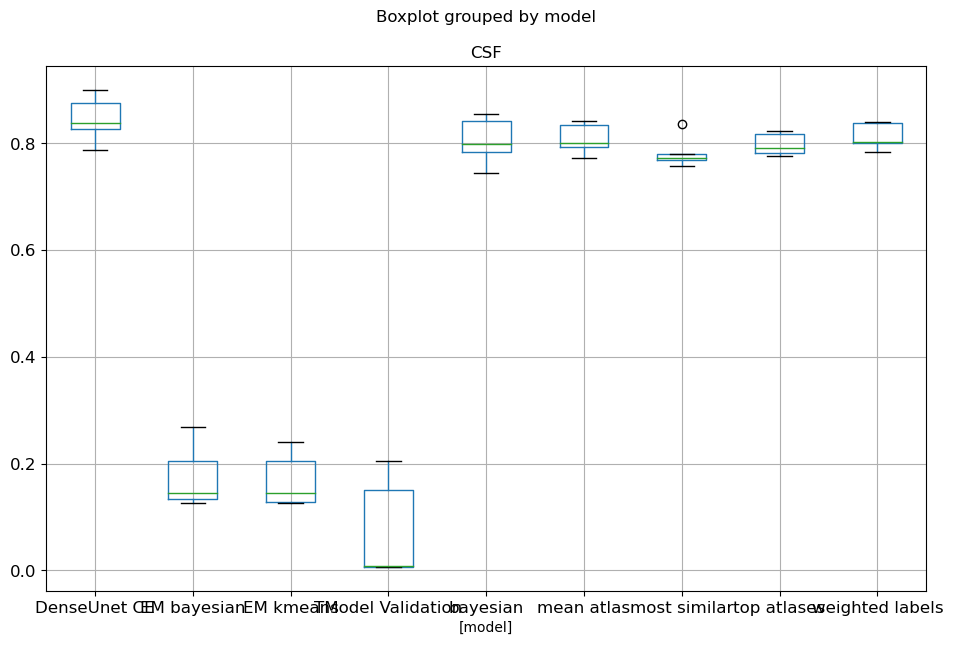

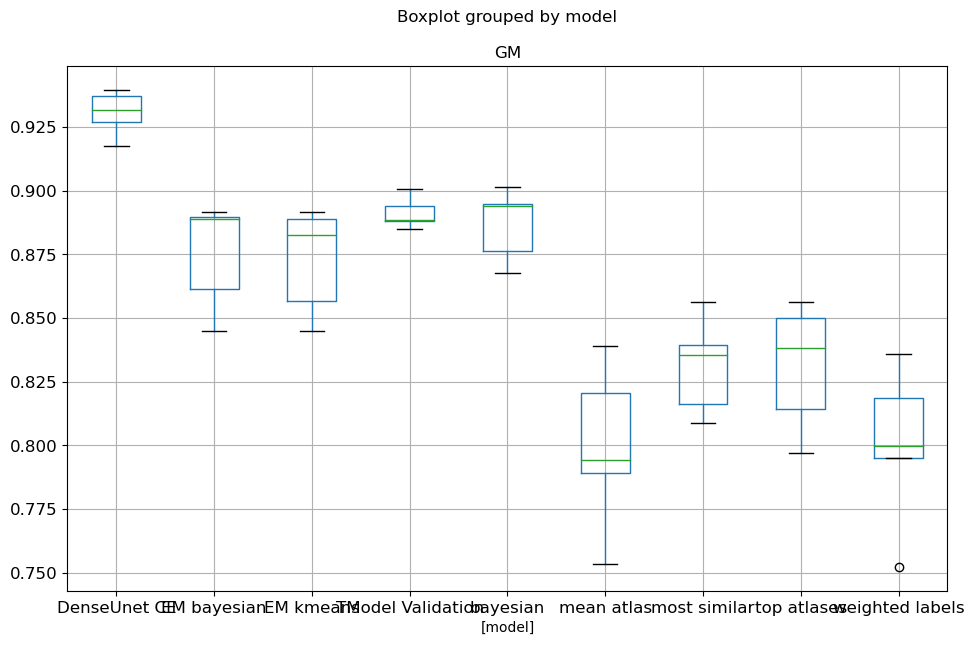

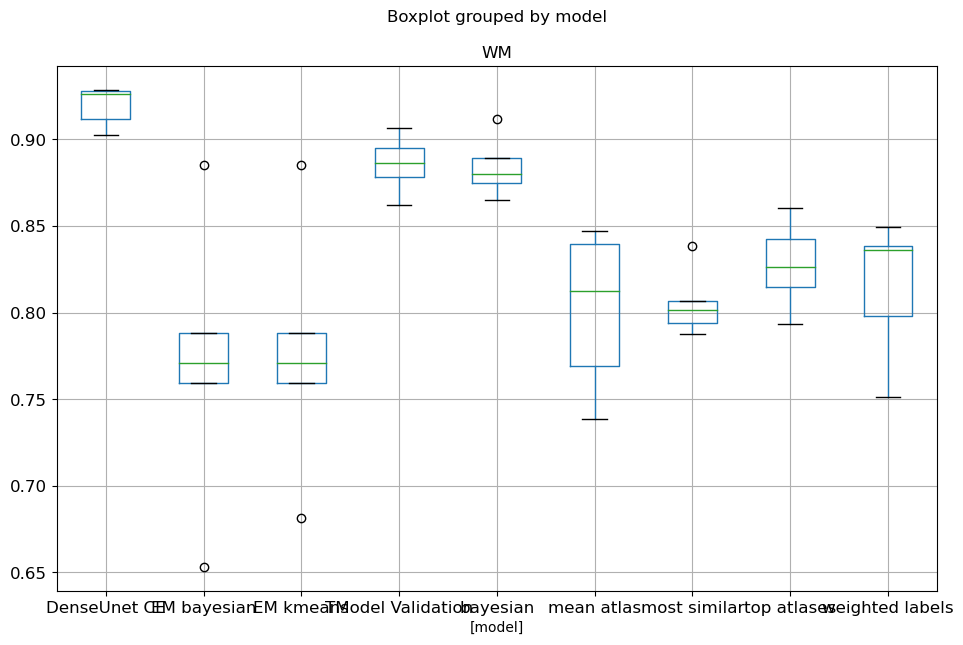

In [20]:
metric = 'dice'
group = 'model'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(11, 7))

## DL models

In [27]:
net_list = ['DenseUnet', 'ResUnet', 'unet']
loss_list = ['CE', 'DL', 'FL']
#create a new list with all combinations of this two lists
model_list = [f'{net}_{loss}_metrics' for net in net_list for loss in loss_list]
#remove 'Dense_Unet_DL_metrics' from the list
model_list.remove('DenseUnet_DL_metrics')
#we first concatenate all the csv files in a single dataframe
general_df = None
for model in model_list:
    #read csv file
    df = pd.read_csv(repo_path /'data' / 'results' / f'{model}.csv')
    #drop all columns except id_val and the tissue
    df = df.drop(columns=[col for col in df.columns if col not in ['id_val', 'CSF', 'GM', 'WM', 'metric']])
    #we add a column with the model name
    df['model'] = model
    #concatenate df in general_df
    general_df = pd.concat([general_df, df], axis=0)

#remove 'metrics' string from the model column
general_df['model'] = general_df['model'].str.replace('_metrics', '').str.replace('_', ' ')
general_df

,id_val,CSF,GM,WM,metric,model
0,11,0.787640,0.917630,0.926432,dice,DenseUnet CE
1,11,19.500000,11.672618,9.000000,hd,DenseUnet CE
2,11,0.018033,0.060804,-0.090840,vdiff,DenseUnet CE
3,12,0.838897,0.926753,0.928787,dice,DenseUnet CE
4,12,31.815877,10.307764,7.762087,hd,DenseUnet CE
...,...,...,...,...,...,...
10,14,124.137037,61.025129,91.663149,hd,unet FL
11,14,-0.079529,-0.043027,0.078387,vdiff,unet FL
12,17,0.893458,0.936307,0.908510,dice,unet FL
13,17,88.516936,15.649117,88.290995,hd,unet FL


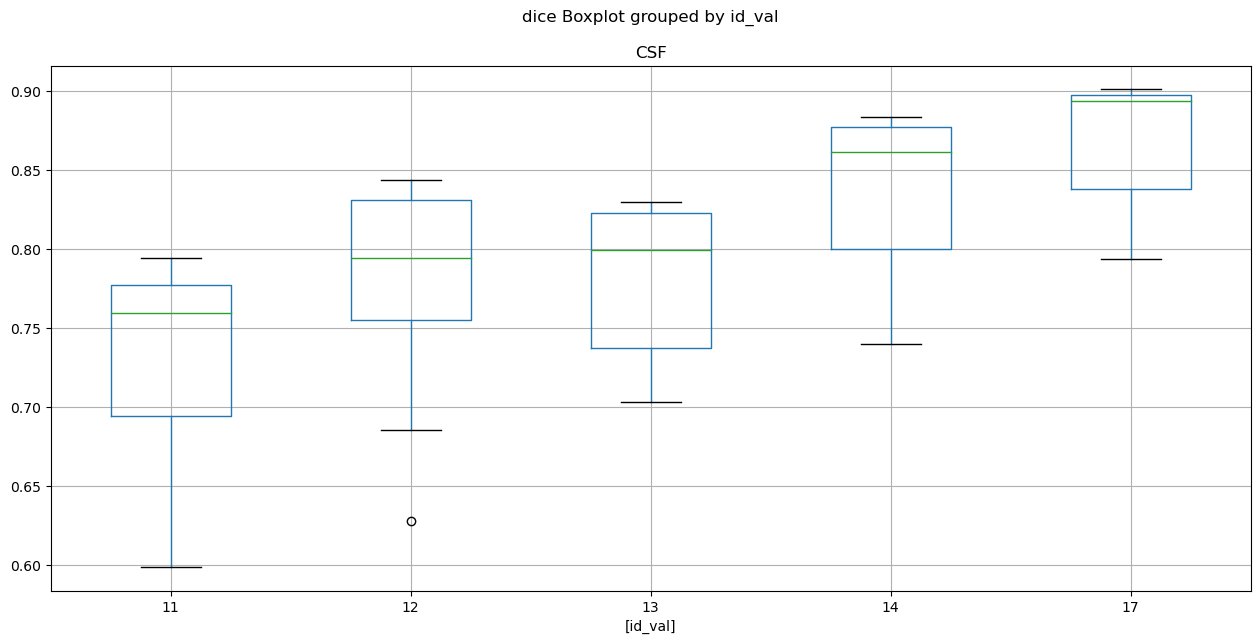

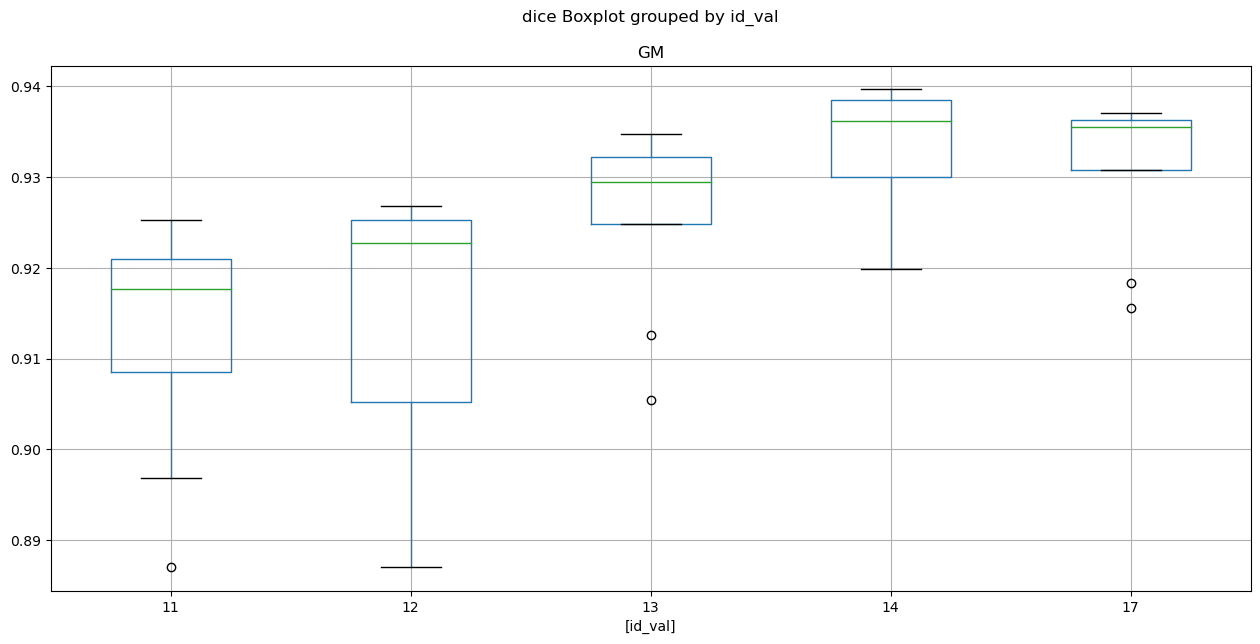

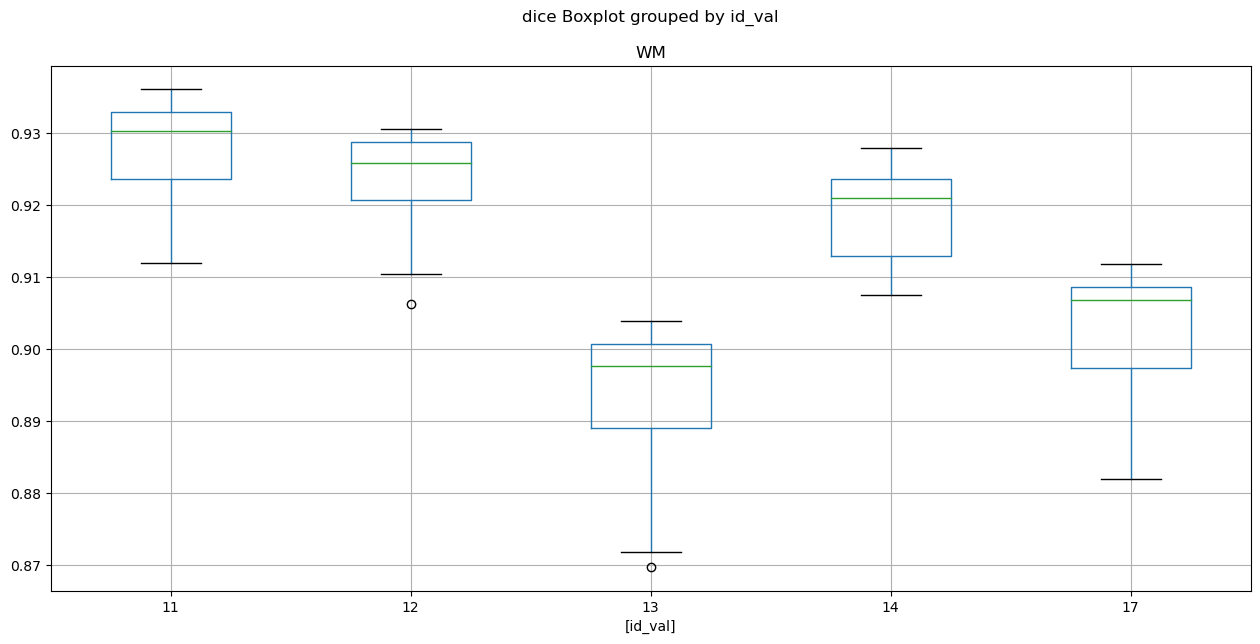

In [40]:
metric = 'dice'
group = 'id_val'

#we first drop all rows that are not of the metric
metriced_df = general_df[general_df['metric'] == metric]
#we now compute the boxplot for each tissue
for tissue in ['CSF', 'GM', 'WM']:
    #we select the tissue
    df_tissue = metriced_df[[tissue, group]]
    #now we compute the boxplot
    df_tissue.boxplot(by=group, figsize=(15, 7))
    #change header
    plt.suptitle(f'{metric} Boxplot grouped by {group}')